In [13]:

using Plots
include("numerical_integration.jl")
 
NUM_STEPS=50

function logistic_growth(x,p)
    r,K = p
    x = x
    dx_dt = r*x*(1-(x/K))
    return dx_dt
end

function SIR(x,p)
    #unpack vector
    β,γ= p 
    S,I,R = x
    N = S+I+R
    #calculate differenitals
    dS = -(β*S*I)/N
    dI = (β*S*I)/N - γ*I
    dR = γ*I
    
    dX = [dS dI dR]#pack differentials into an array
    return dX
end



SIR (generic function with 1 method)

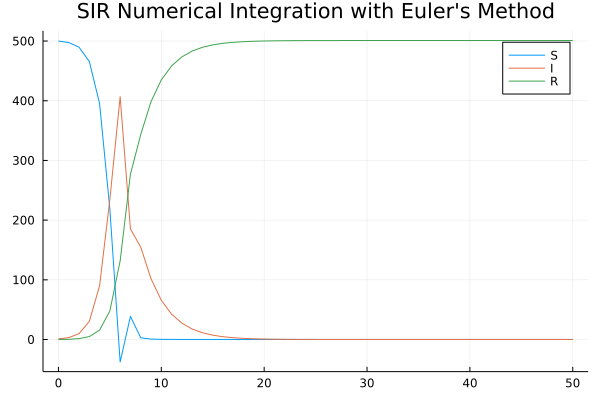

In [14]:
#SIR MODEL with 
x_0 = [500 1 0]
p = [1/2,1/14]
max_time = 250 
num_steps = NUM_STEPS

time_range,SIR_results = ODESolver(SIR,x_0,p,max_time,num_steps,eulers_method)
sir_matrix = vcat(SIR_results...)
s,i,r = sir_matrix[:,1],sir_matrix[:,2],sir_matrix[:,3]



plot(time_range,[s,i,r],labels = ['S' 'I' 'R'],title = "SIR Numerical Integration with Euler's Method")

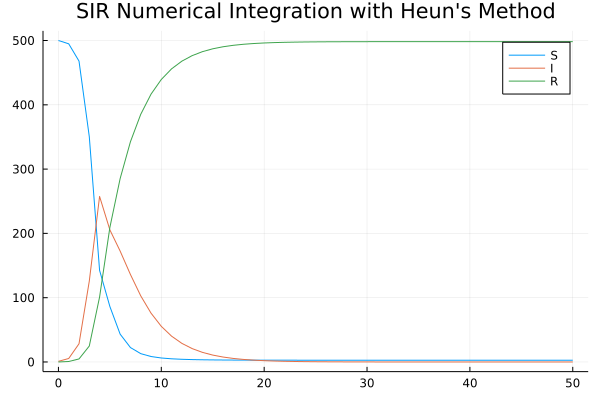

In [15]:
#SIR MODEL with 
x_0 = [500 1 0]
p = [1/2,1/14]
max_time = 250 
num_steps = NUM_STEPS

time_range,SIR_results = ODESolver(SIR,x_0,p,max_time,num_steps,heuns_method)
sir_matrix = vcat(SIR_results...)
s,i,r = sir_matrix[:,1],sir_matrix[:,2],sir_matrix[:,3]



plot(time_range,[s,i,r],labels = ['S' 'I' 'R'],title = "SIR Numerical Integration with Heun's Method")